# Linear Regression

A liner regression respects the following equation:

$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_1x_1 + \dots + \theta_nx_n$$

Where $\theta$ is the model parameter and $x$ is the feature value. So, we use the equation above to train a model, but how can we choose the best values to the parameter? 

The best values for those parameters are the ones that best fits the training set. So, we need to perfrom a performance measure of the model. The most common one is Root Mean Square Error (RMSE). Using the RMSE we need to find the best values for $\theta_n$ that minimize the RMSE or just the MSE, because the minumim of both will result the same model. The equation for this is:

$$ \text{MSE}(\textbf{X}, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}\textbf{X}^{(i)} - y^{(i)})^2$$

## Normal equation

The best values of the parameters are determinated by the normal equation:

$$ \hat{\theta} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^T\textbf{y} $$

Let's see some examples where we use this equation

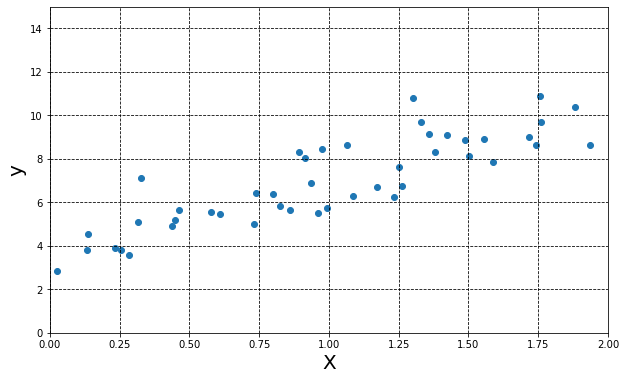

In [1]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng(42)

X = 2 * rng.standard_normal((100, 1))
y = 4 + 3 * X + rng.standard_normal((100, 1))

fontsize = 20
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X, y)
ax.set_xlabel("X", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.grid(c="Black", ls="--")
ax.set_xlim(0, 2)
ax.set_ylim(0, 15)

plt.show()

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Normal equation

print(f"Theta_1 = {theta_best[0][0]}\nTheta_0 = {theta_best[1][0]}")

Theta_1 = 3.995359024799523
Theta_0 = 3.059587317701768


But remember that our fuction, whithout the gaussian, noise is $$ y = 3X + 4$$ 

where $\theta_0 = 4$ and $\theta_1 = 3$. But our results isn't equal to the real ones. Let's now make a prediction using the results above.

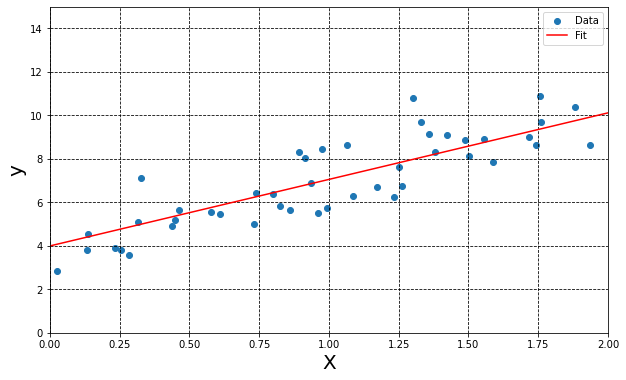

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

fontsize = 20
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X, y, label="Data")
ax.plot(X_new, y_predict, c="Red", label="Fit")
ax.set_xlabel("X", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.grid(c="Black", ls="--")
ax.legend()
ax.set_xlim(0, 2)
ax.set_ylim(0, 15)

plt.show()

We can also use the linear_model module to fit the data

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
linear, angular = lin_reg.intercept_, lin_reg.coef_

print(f"Theta_1 = {angular[0][0]}\nTheta_0 = {linear[0]}")

sk_y_predict = lin_reg.predict(X_new)

Theta_1 = 3.0595873177017703
Theta_0 = 3.995359024799523


All what we have done can also be done using the `lstsq()` function, which the `LinearRegression()` is based on:

In [5]:
theta_best, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

print(f"Thata_0 = {theta_best[0][0]}\nTheta_1 = {theta_best[1][0]}")

Thata_0 = 3.9953590247995248
Theta_1 = 3.0595873177017703


The above procedure is more efficient than calculating the normal equation. This is because all the calculations is using the pseudoinverse:
$$ \hat{\theta} = X^{+}y$$

# Gradient Descent

To define the best parameters to a model we can use the gradient descent method. It will apply the gradient to the cost function and change the values to minimize it's value, in other words, the value that leads to the minimum. With this approach, will be possible to find the best hyperparameters. 

This method has some parameters that we can change:

* **Learning rate (Step):**  Because this method is repetitive, after each iteration, the step is changed by a value - the step. If the Learning rate is too small, the convergence will take a long time, otherwise, if we use a value too big, the model will diverge and probably won't reach the minimum.

* **Cost function behavior:** Some cost function can have a minimum and a global minimum. When this happens, we need to pay attention. When we apply the gradient descent method, it won't be able to say if the found minimum is global or not. So, if our cost function have more than one minimum, we need study different values to make sure we reached the global minimum 

* **Features scales:** The last thing is the scale of the features. We need to make sure that all features are in at the same range, to get better results faster.

## Batch Gradient Descent

One way to use this method is using the **Batch Gradient Descent**, where we will apply the gradient in the hole training set and go in direction of the minimum. This process will repeats until it reaches the maximum value of iterations we defined. Let's see an example using the **MSE** cost function.

The gradient at the $\theta_j$ feature is:

$$ \frac{\partial}{\partial \theta_j}\text{MSE}(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}\textbf{X}^{(i)} - y^{(i)})x_j^{(i)}$$

We also will use the letter $\eta$ to represent the learning rate. So the gradient step is defined as:

$$\theta^{\text{(next step)}} = \theta - \eta \nabla_{\theta}\text{MSE}(\theta)$$

In [6]:
def Example_Batch_Gradient_Descent(features: float, label: float, learning_rate: float, n_iterations: int):
    
    m = len(features)
    theta = rng.standard_normal((2, 1)) # random initialization
    thetas_plot = []
    for interation in range(n_iterations):
        gradients = 2 / m * features.T.dot(features.dot(theta) - label)
        theta = theta - learning_rate * gradients
        if (interation <=  10):
            thetas_plot.append(theta)
        else:
            return theta, thetas_plot

    
    return theta, thetas_plot

def X_features_y_label(theta_best, features):
    X_new = np.array([[np.min(features)], [np.max(features)]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_predict = X_new_b.dot(theta_best)
    
    return X_new, y_predict

grid_color = "Black"
grid_line = "--"

def canvas_plot(canvas_index, features, labels, iteratios, eta):
    eta_0 = eta
    iteratios = iteratios
    
    X_b = np.c_[np.ones((len(features), 1)), features] # add theta0 = 1 to each instance

    theta_0, theta_plot = Example_Batch_Gradient_Descent(X_b, y, eta_0, iteratios)
    
    for n_theta in theta_plot:
        X_y_0 = X_features_y_label(n_theta, features)
        ax[canvas_index].plot(X_y_0[0], X_y_0[1], c="Red")
        
    ax[canvas_index].grid(c=grid_color, ls=grid_line)

    ax[canvas_index].scatter(features, y)
    ax[canvas_index].set_title("$\eta = $" + f"{eta_0}")
    ax[canvas_index].set_xlabel("X")
    ax[canvas_index].set_ylabel("y")
    ax[canvas_index].set_xlim(0, 2)
    ax[canvas_index].set_ylim(0, 15)
    
    print(f"For eta = {eta}")
    print(f"theta_0 = {theta_0[0][0]:.3E}\ttheta_1 = {theta_0[1][0]:.3E}\n")

Final results for the parameters

For eta = 0.02
theta_0 = 1.715E+00	theta_1 = 2.484E+00

For eta = 0.1
theta_0 = 3.711E+00	theta_1 = 3.038E+00

For eta = 0.5
theta_0 = 1.536E+01	theta_1 = -1.559E+02



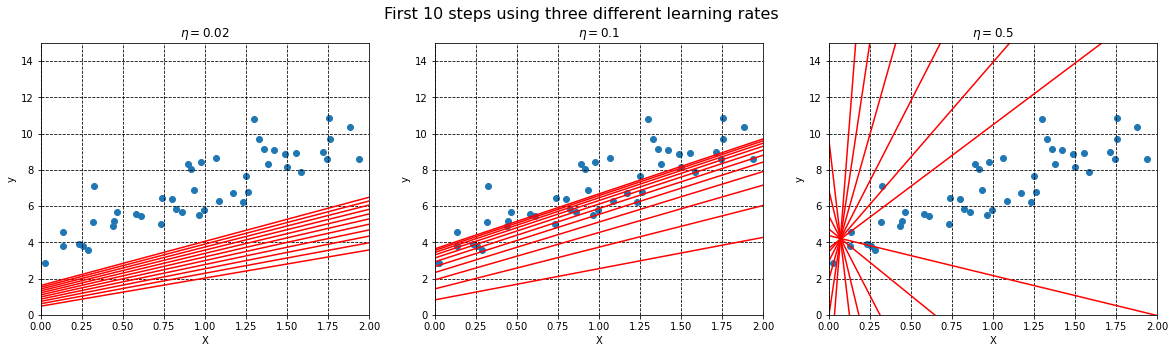

In [7]:
eta_0 = 0.02
eta_1 = 0.1 
eta_2 = 0.5
iteratios = 1000

fig, ax = plt.subplots(1, 3, figsize=(20,5))
print(f"Final results for the parameters\n")

canvas_plot(0, X, y, iteratios, eta_0)
canvas_plot(1, X, y, iteratios, eta_1)
canvas_plot(2, X, y, iteratios, eta_2)

fig.suptitle("First 10 steps using three different learning rates", fontsize=16)
plt.show()

## Stochastic Gradient Descent

We saw that the **Gradient Descent** method uses all the training set to find the parameters values. This approach can be really expensive when we have a big training Dataset. If this is a problem we can use the **Stochastic Gradient Descent** which apply the Gradient Descent for one random set of features. 

This will be faster than the Gradient Descent, of course, but because the set feature is a random one, the cost function will bounce "up and down" until the iterations ends. This nature will not necessarily return the best parameters. To avoid this, we add a new function to our model, `learning schedule`, which will calculate the new learning rate, avoiding the model to diverge from the optimal value.

In [8]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t, t0=t0, t1=t1):
    return t0 / (t + t1)

def Example_Stochastic_Gradient_Descent(features, labels, learning_schedule, n_epochs=n_epochs):
    
    m = len(features)
    theta = rng.standard_normal((2, 1))
    X_b = np.c_[np.ones((m, 1)), features] # add theta0 = 1 to each instance
    
    theta_plot = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = rng.integers(m)
            # Use one set of features
            xi = X_b[random_index: random_index + 1]
            yi = labels[random_index: random_index + 1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            
            if(epoch == 0 & i < 20):
                theta_plot.append(theta)
    
    return theta, theta_plot

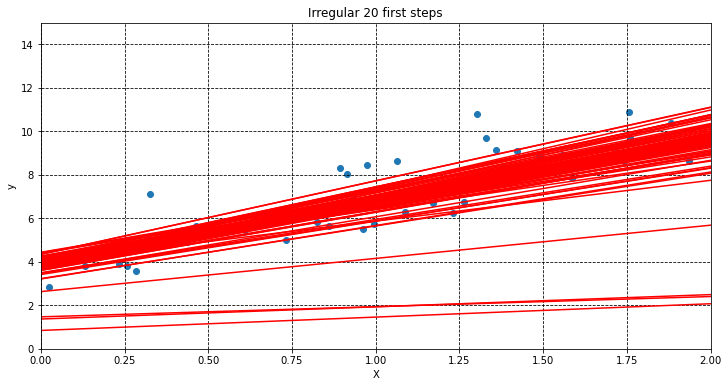

In [9]:
theta, theta_plot = Example_Stochastic_Gradient_Descent(X, y, learning_schedule)

fig, ax = plt.subplots(figsize=(12, 6))

ax.grid(c=grid_color, ls=grid_line)
ax.scatter(X, y)

ax.set_xlim(0, 2)
ax.set_ylim(0, 15)
ax.set_xlabel("X")
ax.set_ylabel("y")

for n_theta in theta_plot:
    X_y_0 = X_features_y_label(n_theta, X)
    ax.plot(X_y_0[0], X_y_0[1], c="Red")
    
ax.set_title("Irregular 20 first steps")

plt.show()

We can also, and it is better to, use the `SGDRegressor` class from the Scikit-Learn to perform a linear regression

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                      tol=1e-3,
                      penalty=None,
                      eta0=0.1)

sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04169946]), array([3.15475088]))

# Polynomial Regression

When our data is non linear we can still use a linear model to fit the data. To make this possible, we use the features we have plus the square (or some other degree) of the same data and than fit a linear model. Let's see how this works

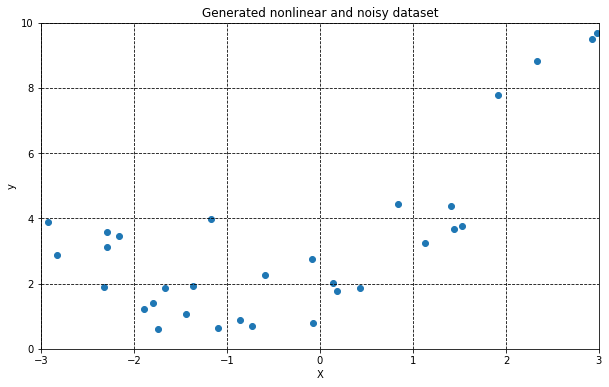

In [16]:
m_features = 100

X = 6 * rng.standard_normal((m_features, 1)) - 3
y = 0.5 * X**2 + X + 2 + rng.standard_normal((m_features, 1))

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(X, y)
ax.set_xlabel("X")
ax.set_ylabel("y")

ax.grid(c=grid_color, ls=grid_line)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 10)
ax.set_title("Generated nonlinear and noisy dataset")

plt.show()

In [19]:
# Now, we need to fit this data. It's here where we add the square of our features
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"{X[0] = }\n{X_poly[0] = }")

X[0] = array([1.52917135])
X_poly[0] = array([1.52917135, 2.33836503])


In [65]:
# Now we can fit
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

a0 = lin_reg.intercept_[0]
a1, a2 = lin_reg.coef_[0]

print(f"a_0 = {a0}\na_1 = {a1}\na_2 = {a2}\n")

a_0 = 2.1537339681786456
a_1 = 0.9943635635303529
a_2 = 0.4992104101495904



Our data obey the following equation:
$$y = \frac{X^2}{2} + X + 2 + \text{Noise}$$

So, we can see that our fit returns good values

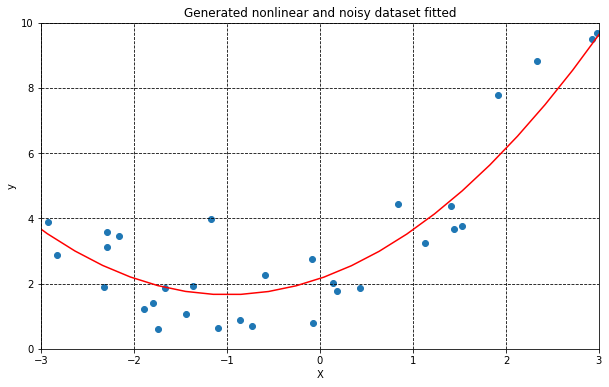

In [64]:
fig, ax = plt.subplots(figsize=(10,6))

poly_function = np.polynomial.polynomial.Polynomial([a0,a1,a2])
X_plot = np.linspace(np.min(X), np.max(X), 100)

ax.scatter(X, y)
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.plot(X_plot, poly_function(X_plot), c="Red")

ax.grid(c=grid_color, ls=grid_line)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 10)
ax.set_title("Generated nonlinear and noisy dataset fitted")

plt.show()